In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('bank.csv')

In [3]:
df['loan'].value_counts()

no     9702
yes    1460
Name: loan, dtype: int64

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


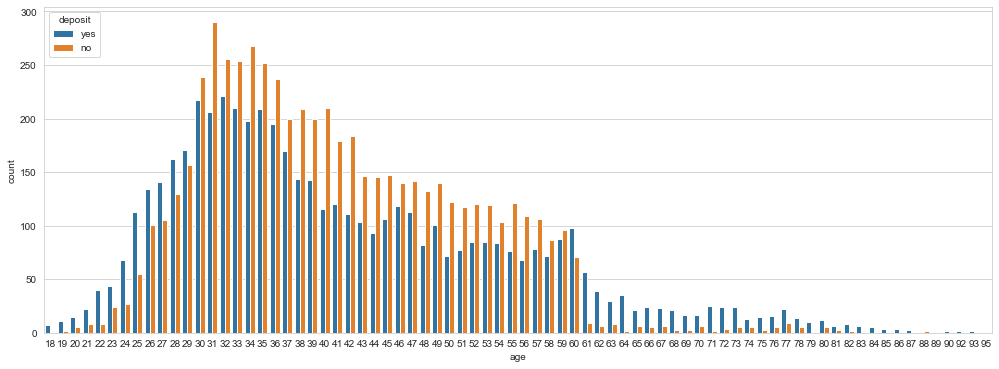

In [6]:
plt.figure(figsize = (17, 6))
sns.countplot('age', hue = 'deposit', data = df)

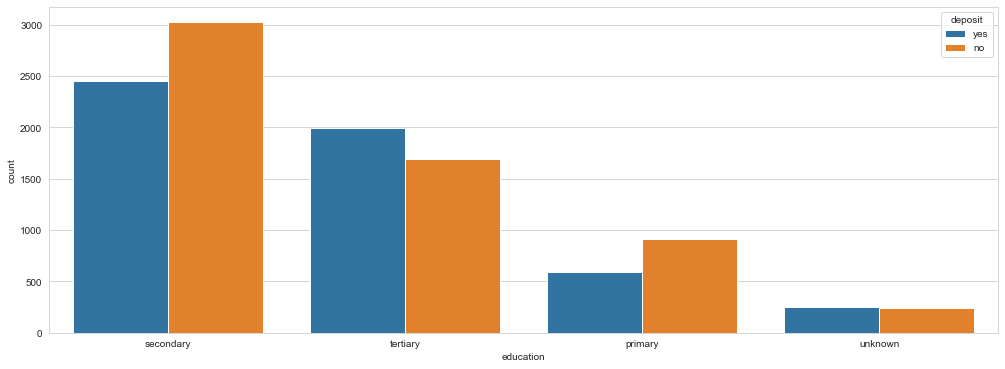

In [7]:
plt.figure(figsize = (17, 6))
sns.countplot('education', hue = 'deposit', data = df)

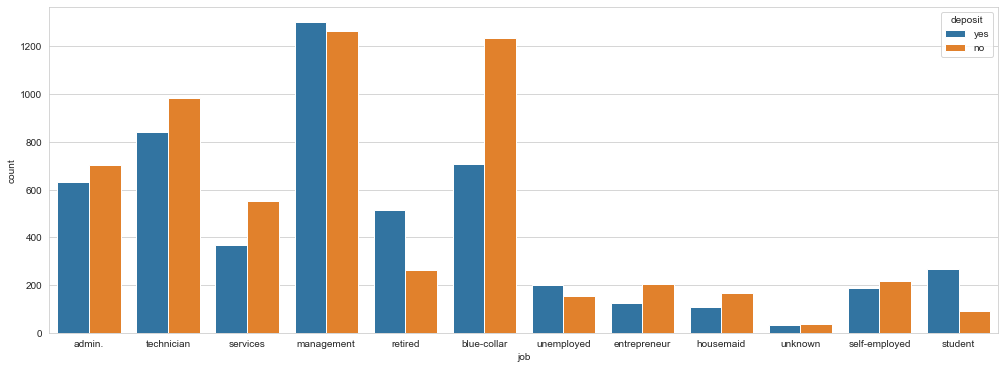

In [8]:
plt.figure(figsize = (17, 6))
sns.countplot('job', hue = 'deposit', data = df)

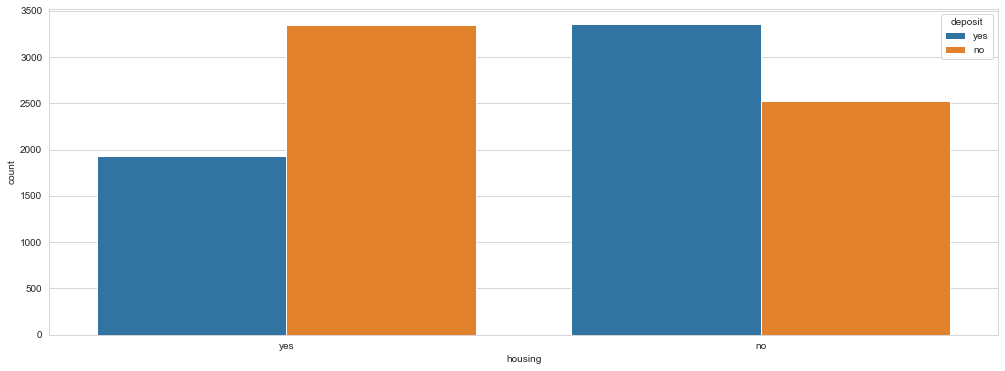

In [9]:
plt.figure(figsize = (17, 6))
sns.countplot('housing', hue = 'deposit', data = df)

In [10]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


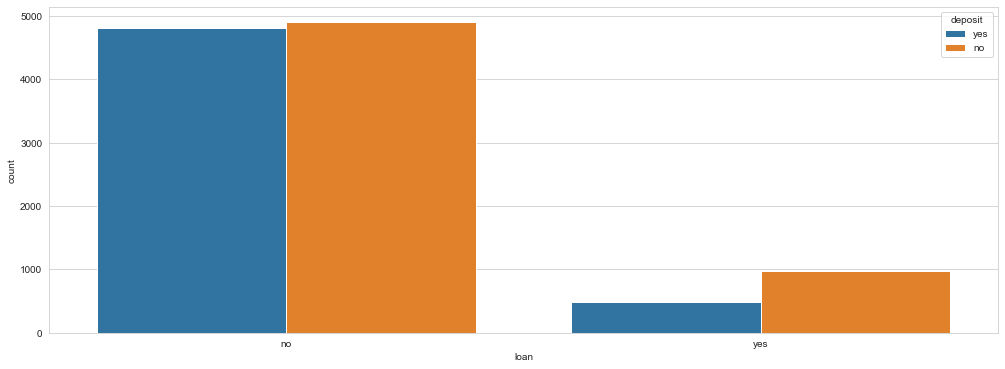

In [11]:
plt.figure(figsize = (17, 6))
sns.countplot('loan', hue = 'deposit', data = df)

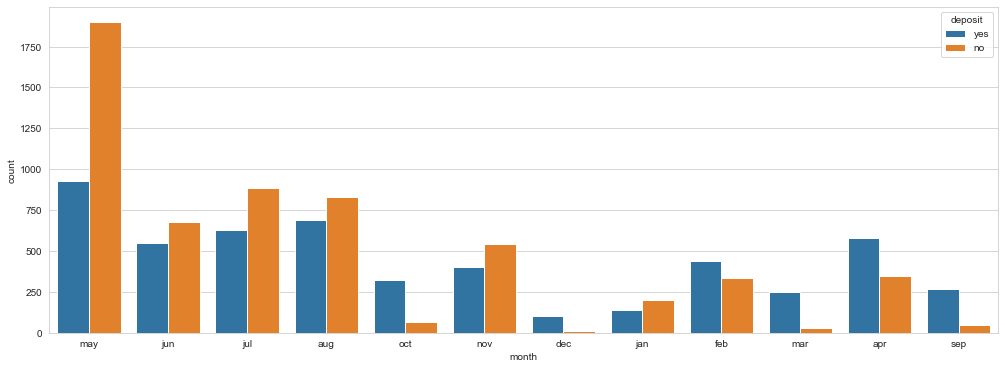

In [12]:
plt.figure(figsize = (17, 6))
sns.countplot('month', hue = 'deposit', data = df)

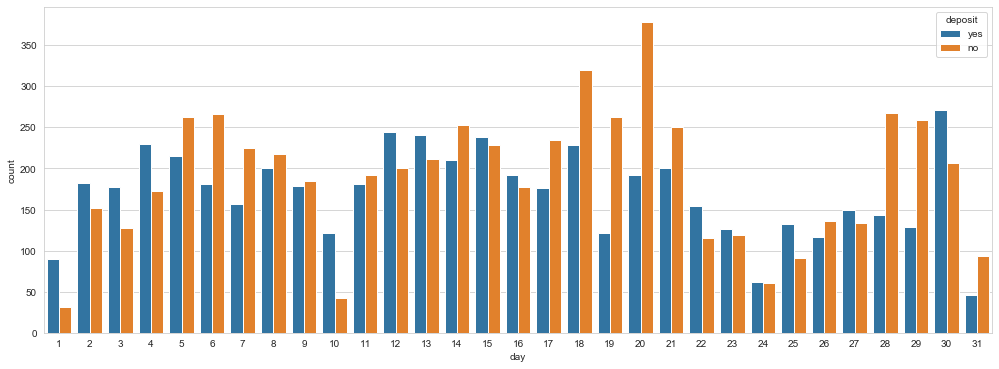

In [13]:
plt.figure(figsize = (17, 6))
sns.countplot('day', hue = 'deposit', data = df)

In [14]:
def impute(col):
    if col <= 4:
        return 1
    if col > 4 and col <= 10:
        return 2
    if col > 10 and col <= 13:
        return 3
    if col > 14 and col <= 21:
        return 4
    if col > 21:
        return 5

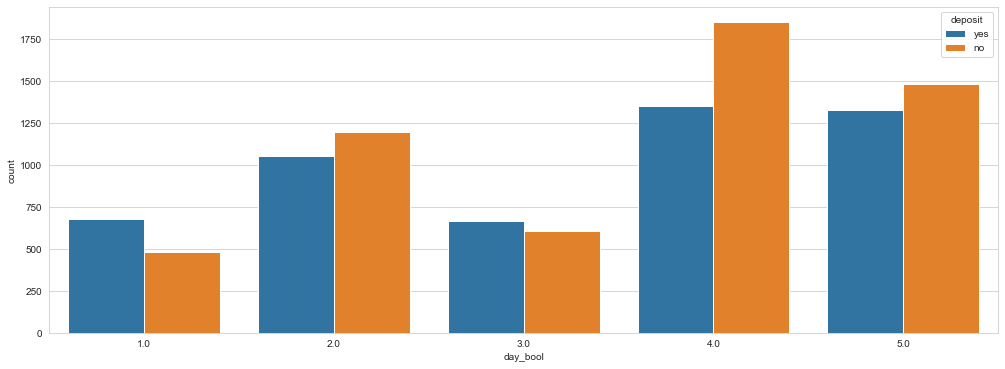

In [15]:
df['day_bool'] = df['day'].apply(impute)
plt.figure(figsize = (17, 6))
sns.countplot('day_bool', hue = 'deposit', data = df)

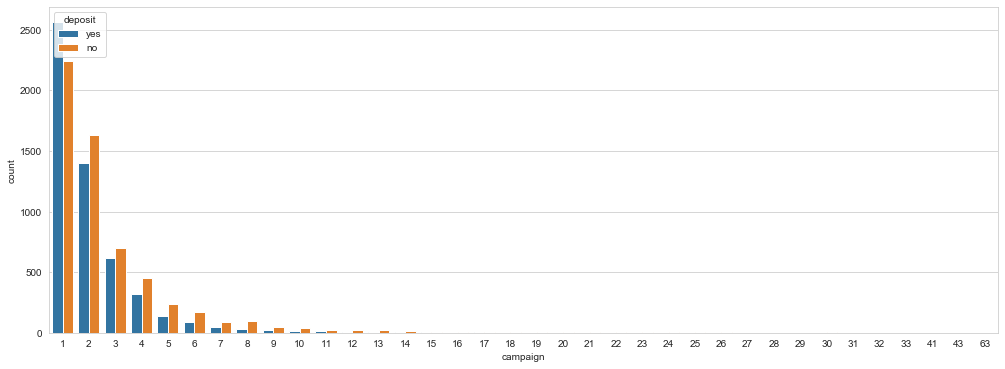

In [16]:
plt.figure(figsize = (17, 6))
sns.countplot('campaign', hue = 'deposit', data = df)

In [17]:
avg_duration = df['duration'].mean()

In [18]:
avg_duration

371.99381831213043

In [19]:
def impute(col):
    if col < avg_duration:
        return 'below_average'
    if col > avg_duration:
        return 'above_average'

In [20]:
df['duration_bool'] = df['duration'].apply(impute)

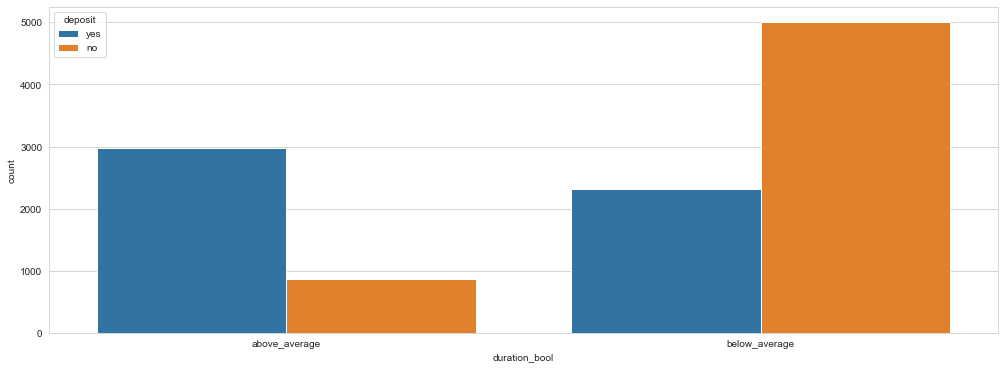

In [21]:
plt.figure(figsize = (17, 6))
sns.countplot('duration_bool', hue = 'deposit', data = df)

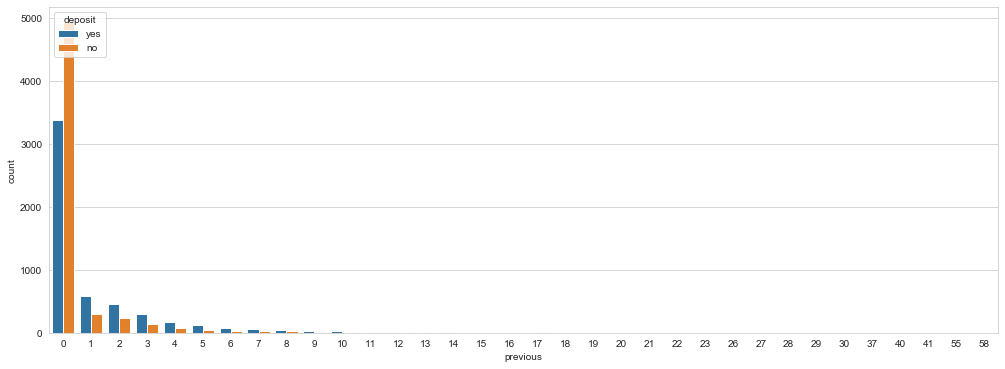

In [22]:
plt.figure(figsize = (17, 6))
sns.countplot('previous', hue = 'deposit', data = df)

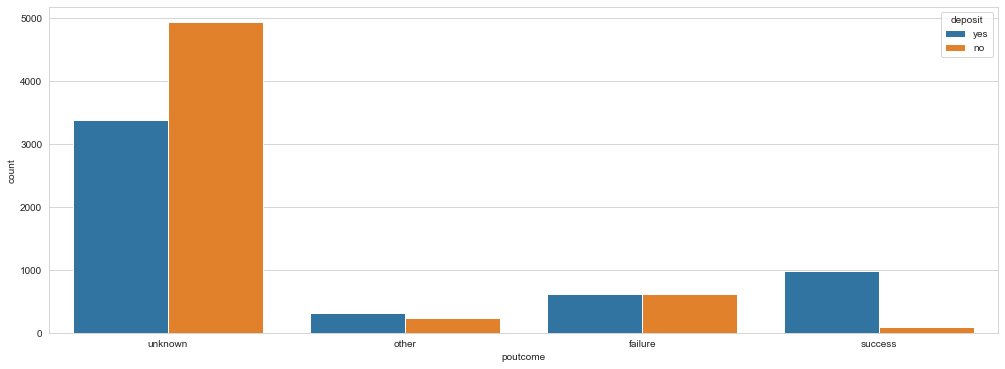

In [23]:
plt.figure(figsize = (17, 6))
sns.countplot('poutcome', hue = 'deposit', data = df)

In [24]:
df.drop(['day_bool', 'duration_bool', 'pdays'], axis = 1, inplace = True)

In [25]:
df['deposit']=df['deposit'].map({'yes':1,'no':0})
df = pd.get_dummies(df, columns=['job','marital','education',"month",'default','housing',"loan","contact","poutcome"], drop_first=True)

In [26]:
df.head()

,age,balance,day,duration,campaign,previous,deposit,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,5,1042,1,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
1,56,45,5,1467,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,41,1270,5,1389,1,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
3,55,2476,5,579,1,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
4,54,184,5,673,2,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.metrics import confusion_matrix, classification_report

In [28]:
X = df.drop('deposit', axis = 1)
y = df['deposit']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier())
gs_knn = GridSearchCV(estimator=pipeline, param_grid={'kneighborsclassifier__n_neighbors': [3,4,5,6,7]}, scoring='accuracy', cv = 10)
knn_score = cross_val_score(gs_knn, X = X_train, y = y_train, cv = 5, scoring='accuracy', n_jobs=-1)
gs_knn.fit(X_train, y_train)
gs_best = gs_knn.best_estimator_
gs_best.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('kneighborsclassifier',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=7, p=2,
                                      weights='uniform'))],
         verbose=False)

In [31]:
prediction=gs_best.predict(X_test)
print(confusion_matrix(prediction ,y_test))
print(classification_report(prediction ,y_test))

[[1470  498]
 [ 272 1109]]
              precision    recall  f1-score   support

           0       0.84      0.75      0.79      1968
           1       0.69      0.80      0.74      1381

    accuracy                           0.77      3349
   macro avg       0.77      0.77      0.77      3349
weighted avg       0.78      0.77      0.77      3349



In [32]:
pipeline = make_pipeline(StandardScaler(), LogisticRegression())
gs_lr = GridSearchCV(estimator=pipeline, param_grid={'logisticregression__C': np.arange(1, 5), 'logisticregression__max_iter': [100, 300, 1000, 3000]}, scoring = 'accuracy', cv = 10)
gs_score = cross_val_score(gs_lr, X = X_train, y = y_train, cv = 5, scoring='accuracy', n_jobs=-1)
gs_lr.fit(X_train, y_train)
gs_best = gs_lr.best_estimator_
gs_best.fit(X_train, y_train)
prediction=gs_best.predict(X_test)
print(confusion_matrix(prediction ,y_test))
print(classification_report(prediction ,y_test))

[[1479  339]
 [ 263 1268]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1818
           1       0.79      0.83      0.81      1531

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349



In [35]:
rf = RandomForestClassifier()
gs_rf = GridSearchCV(estimator = rf, param_grid={'n_estimators': [100, 300, 400]}, scoring='accuracy', cv = 2)
gs_score = cross_val_score(gs_rf, X = X_train, y = y_train, cv = 5, scoring='accuracy', n_jobs=-1)
gs_rf.fit(X_train, y_train)
gs_best = gs_rf.best_estimator_
gs_best.fit(X_train, y_train)
prediction=gs_best.predict(X_test)
print(confusion_matrix(prediction ,y_test))
print(classification_report(prediction ,y_test))

[[1427  213]
 [ 315 1394]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1640
           1       0.87      0.82      0.84      1709

    accuracy                           0.84      3349
   macro avg       0.84      0.84      0.84      3349
weighted avg       0.84      0.84      0.84      3349



Text(0, 0.5, 'Features')

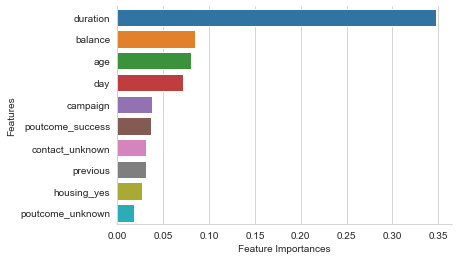

In [42]:
feature = gs_best.feature_importances_
feature_importances = pd.Series(feature, index=X_train.columns).sort_values(ascending = False)
sns.barplot(x=feature_importances[0:10], y=feature_importances.index[0:10])
sns.despine()
plt.xlabel("Feature Importances")
plt.ylabel("Features")